In [1]:
import tensorflow as tf

print(tf.__version__)

from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import *
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import SGD, RMSprop, Adam, Adagrad, Adadelta

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

import matplotlib.pyplot as plt
import random
# import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn
import scipy
import skimage
from skimage.transform import resize
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

2023-09-16 22:58:08.934518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 22:58:12.020470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-09-16 22:58:12.020637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

2.11.0


In [2]:
# !git clone https://github.com/EricMartinezIllamola/asl-alphabet.git

In [3]:
# !pip install split-folders 

In [4]:
# import splitfolders
# import os

In [5]:
# path = "asl-alphabet/asl-alphabet"

# splitfolders.ratio(path, seed=777, output="Train-Validation-Test-Dataset", ratio=(0.6, 0.2, 0.2))

In [6]:
train_path = "Train-Validation-Test-Dataset/train"
val_path = "Train-Validation-Test-Dataset/val"
test_path = "Train-Validation-Test-Dataset/test"

In [7]:
from tensorflow.keras.preprocessing.image   import ImageDataGenerator

##Clasificamos las imagenes
bs = 64 #bach size
k = 2
# Generador de imágenes de entrenamiento.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=(0.3),
        zoom_range=(0.3),
        width_shift_range=(0.2),
        height_shift_range=(0.2),
        # validation_split = 0.2,
        brightness_range=(0.05,0.85),
        horizontal_flip=False)

# Carga de imágenes al generador de entrenamiento desde directorio.
train_generator = train_datagen.flow_from_directory(
        train_path,
        class_mode='categorical',
        shuffle=True,
        target_size=(28*k, 28*k),
        color_mode = 'rgb', 
        # subset = 'training',
        batch_size=bs)

valid_generator = train_datagen.flow_from_directory(
        val_path,
        class_mode='categorical',
        shuffle=False,
        target_size=(28*k, 28*k),
        color_mode = 'rgb', 
        # subset = 'validation',
        batch_size=bs)

test_generator = train_datagen.flow_from_directory(
        test_path,
        class_mode='categorical',
        shuffle=False,
        target_size=(28*k, 28*k),
        color_mode = 'rgb', 
        # subset = 'validation',
        batch_size=bs)

Found 44695 images belonging to 24 classes.
Found 14892 images belonging to 24 classes.
Found 14921 images belonging to 24 classes.


In [8]:
from numpy.random import seed
tf.keras.utils.set_random_seed(42)# keras seed fixing
tf.random.set_seed(42)# tensorflow seed fixing

with tf.device("/CPU:0"):
# with tf.device("/GPU:0"):

    model = tf.keras.models.load_model('model-04')

    model.summary()

2023-09-16 22:58:22.715192: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-16 22:58:22.728920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-16 22:58:22.730649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-16 22:58:22.733007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                12312     
                                                                 
Total params: 20,299,352
Trainable params: 20,039,192
Non-trainable params: 260,160
_________________________________________________________________


In [9]:
with tf.device("/CPU:0"):
    preds_test = model.predict(test_generator)

234/234 [==============================] - 75s 317ms/step


In [10]:
with tf.device("/CPU:0"):
    evaluate_test = model.evaluate(test_generator)

234/234 [==============================] - 75s 318ms/step - loss: 1.7689 - accuracy: 0.9719


In [11]:
with tf.device("/CPU:0"):
    print(evaluate_test)

[1.7688614130020142, 0.9719187617301941]


In [12]:
with tf.device("/CPU:0"):
    y_preds_test = np.array([np.argmax(x) for x in preds_test])
    print(y_preds_test)

[ 2  0  9 ... 23 23 23]


In [13]:
with tf.device("/CPU:0"):
    y_real_test = test_generator.classes
    print(y_real_test)

[ 0  0  0 ... 23 23 23]


In [14]:
with tf.device("/CPU:0"):
    accuracy_test = accuracy_score(y_real_test, y_preds_test)
    print(accuracy_test)

0.9707124187386904


In [15]:
with tf.device("/CPU:0"):
    cm_test = confusion_matrix(y_real_test, y_preds_test)
    print(cm_test)

[[597   1   1   0   3   0   0   0   0   1   0   2   1   0   0   1   1   4
    6   1   0   1   0   0]
 [  1 608   1   1   2   0   0   0   0   0   0   2   0   0   1   0   1   0
    0   6   0   0   0   0]
 [  0   1 624   0   1   1   0   0   0   0   0   0   0   1   0   5   0   0
    0   0   0   0   0   0]
 [  1   1   1 605   1   3   0   0   0   0   0   0   1   6   0   0   0   0
    0   2   1   0   0   0]
 [  5   3   1   0 597   0   0   0   6   0   0   1   2   4   0   0   2  16
    0   0   0   0   0   0]
 [  0   1   0   0   1 612   4   0   0   0   0   0   1   2   0   0   0   1
    0   0   1   1   0   0]
 [  0   0   0   0   0   0 613   4   0   0   0   0   0   0   3   0   1   1
    0   0   0   1   0   0]
 [  0   0   0   0   0   0   9 607   0   0   1   0   0   0   0   1   3   0
    0   0   0   0   0   0]
 [  0   0   0   2   3   1   0   0 607   0   0   1   0   0   0   0   0   1
    0   0   3   0   0   4]
 [  1   0   0   0   0   1   2   0   0 593   0   0   0   0   0   0   7   0
    1   3  12   2

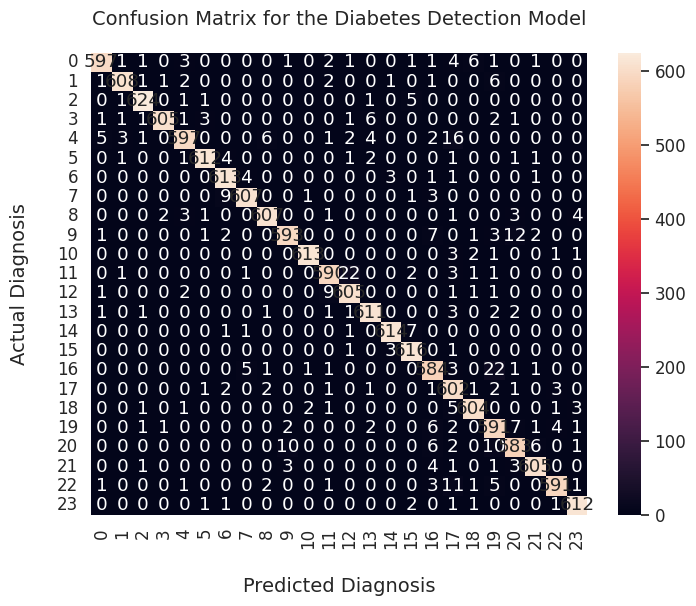

In [16]:
with tf.device("/CPU:0"):
    plt.figure(figsize=(8,6), dpi=100)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)

    # Plot Confusion Matrix using Seaborn heatmap()
    # Parameters:
    # first param - confusion matrix in array format   
    # annot = True: show the numbers in each heatmap cell
    # fmt = 'd': show numbers as integers. 
    ax = sns.heatmap(cm_test, annot=True, fmt='d', )

    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    # ax.xaxis.set_ticklabels(['Negative', 'Positive'])

    # set y-axis label and ticks
    ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    # ax.yaxis.set_ticklabels(['Negative', 'Positive'])

    # set plot title
    ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

    plt.show()

In [17]:
with tf.device("/CPU:0"):
    preds_val = model.predict(valid_generator)

233/233 [==============================] - 74s 318ms/step


In [18]:
with tf.device("/CPU:0"):
    evaluate_val = model.evaluate(valid_generator)

233/233 [==============================] - 74s 318ms/step - loss: 1.7615 - accuracy: 0.9746


In [19]:
with tf.device("/CPU:0"):
    print(evaluate_val)

[1.7614883184432983, 0.9746172428131104]


In [20]:
with tf.device("/CPU:0"):
    y_preds_val = np.array([np.argmax(x) for x in preds_val])
    print(y_preds_val)

[ 0  0  0 ... 23 23 23]


In [21]:
with tf.device("/CPU:0"):
    y_real_val = valid_generator.classes
    print(y_real_val)

[ 0  0  0 ... 23 23 23]


In [22]:
with tf.device("/CPU:0"):
    accuracy_val = accuracy_score(y_real_val, y_preds_val)
    print(accuracy_val)

0.9768331990330379


In [23]:
with tf.device("/CPU:0"):
    cm_val = confusion_matrix(y_real_val, y_preds_val)
    print(cm_val)

[[593   2   3   0   4   0   0   0   0   0   0   1   1   0   0   0   0   3
   10   0   0   0   1   0]
 [  1 608   1   1   3   0   0   0   2   0   0   1   1   0   0   0   2   1
    0   0   0   0   0   0]
 [  0   2 627   1   0   0   0   0   0   0   0   0   0   1   0   1   0   0
    0   0   0   0   0   0]
 [  0   0   2 613   1   0   0   0   0   0   0   0   0   2   0   0   0   1
    0   0   1   0   0   0]
 [  2   2   0   0 613   0   0   0   5   0   0   1   0   0   0   1   2   8
    1   1   1   0   0   0]
 [  1   0   0   1   0 613   3   0   2   0   0   0   0   0   0   0   1   0
    0   0   1   0   0   0]
 [  0   0   0   0   0   0 612   7   1   0   0   0   0   0   1   1   1   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   9 610   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1]
 [  0   1   1   0   1   1   3   0 607   1   1   0   0   0   0   0   1   2
    0   0   0   0   0   1]
 [  0   0   0   0   0   0   2   0   1 598   0   0   0   0   0   0   1   0
    0   6   6   5

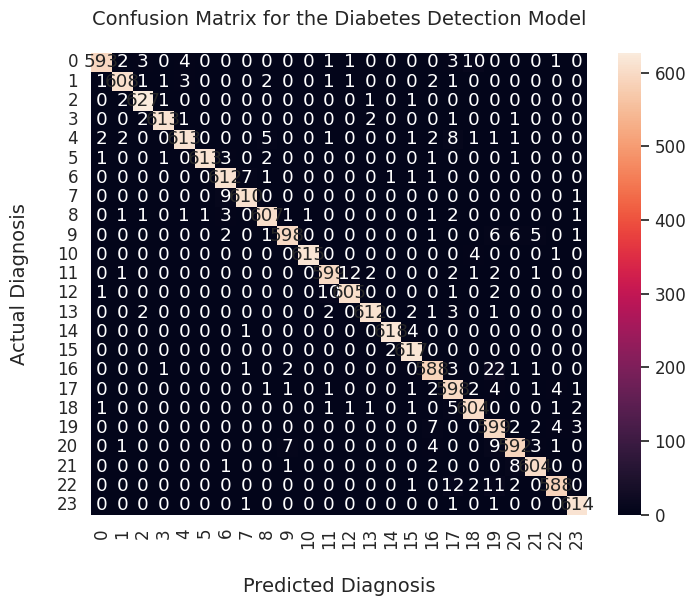

In [24]:
with tf.device("/CPU:0"):
    plt.figure(figsize=(8,6), dpi=100)
    # Scale up the size of all text
    sns.set(font_scale = 1.1)

    # Plot Confusion Matrix using Seaborn heatmap()
    # Parameters:
    # first param - confusion matrix in array format   
    # annot = True: show the numbers in each heatmap cell
    # fmt = 'd': show numbers as integers. 
    ax = sns.heatmap(cm_val, annot=True, fmt='d', )

    # set x-axis label and ticks. 
    ax.set_xlabel("Predicted Diagnosis", fontsize=14, labelpad=20)
    # ax.xaxis.set_ticklabels(['Negative', 'Positive'])

    # set y-axis label and ticks
    ax.set_ylabel("Actual Diagnosis", fontsize=14, labelpad=20)
    # ax.yaxis.set_ticklabels(['Negative', 'Positive'])

    # set plot title
    ax.set_title("Confusion Matrix for the Diabetes Detection Model", fontsize=14, pad=20)

    plt.show()